# Importación modulos y datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.preprocessing import normalize


matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
#data = pd.read_csv("merge_20220812.csv", low_memory=False) 

In [2]:
data = pd.read_csv("../data/conchillas_orig.csv", low_memory=False) 

# Exploración y limpieza de datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lote       1688 non-null   int64  
 1   Individuo  1688 non-null   int64  
 2   AE         1688 non-null   float64
 3   LE         1688 non-null   float64
 4   AT         1688 non-null   float64
 5   LT         1688 non-null   float64
 6   AA         1688 non-null   float64
 7   LA         1688 non-null   float64
 8   NV         1688 non-null   float64
 9   Morfotipo  1688 non-null   object 
 10  Labio      1688 non-null   int64  
 11  cox1-lsu   105 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 158.4+ KB


In [4]:
data = data.dropna(subset=['Labio'])

In [5]:
data.iloc[:,2:].describe()

AE           LE           AT           LT           AA  \
count  1688.000000  1688.000000  1688.000000  1688.000000  1688.000000   
mean      6.242690     1.763626    13.268957     9.778969     7.692814   
std       0.981426     0.376717     1.942482     1.436368     1.234036   
min       3.120000     0.680000     8.020000     6.050000     4.710000   
25%       5.577500     1.500000    11.777500     8.760000     6.787500   
50%       6.240000     1.760000    13.195000     9.695000     7.590000   
75%       6.892500     2.030000    14.602500    10.845000     8.560000   
max       9.070000     3.150000    19.130000    14.460000    11.970000   

                LA           NV        Labio  
count  1688.000000  1688.000000  1688.000000  
mean      6.264846     5.144419     0.578199  
std       0.914297     0.298324     0.493993  
min       4.210000     4.000000     0.000000  
25%       5.600000     4.950000     0.000000  
50%       6.140000     5.175000     1.000000  
75%       6.800000     5.340000     1.000000  
max       9.770000     5.970000     1.000000

In [6]:
print(pd.value_counts(data["Morfotipo"], sort = True, normalize=True))

LU    0.860190
LB    0.132701
DU    0.007109
Name: Morfotipo, dtype: float64


In [7]:
print(pd.value_counts(data["Labio"], sort = True, normalize=True))

1    0.578199
0    0.421801
Name: Labio, dtype: float64


In [8]:
data['cox1-lsu'].value_counts()

AA    68
HG    10
GC     3
GF     3
LA     3
BA     3
OA     2
CA     2
GE     2
EA     1
GD     1
JH     1
IG     1
KI     1
DA     1
AB     1
MG     1
FA     1
Name: cox1-lsu, dtype: int64

### Creación columnas nuevas

In [9]:
#Creamos un Filtro con NV > 4.75 y presencia de labio (divide adulto de joven???)
data["Filtro_NV"] = np.where(np.logical_or(data["NV"] > 4.75, data["Labio"] == 1),True,False)

In [10]:
print(pd.value_counts(data["Filtro_NV"], sort = True, normalize=True))

True     0.9141
False    0.0859
Name: Filtro_NV, dtype: float64


In [11]:
data["Ratio_AE_LE"] = data["AE"]/data["LE"]
data["Ratio_AA_LA"] = data["AA"]/data["LA"]
data["Ratio_AT_LT"] = data["AT"]/data["LT"]

#data["Ratio_LE_AE"] = data["LE"]/data["AE"]
#data["Ratio_LT_AT"] = data["LT"]/data["AT"]
#data["Ratio_LA_AA"] = data["LA"]/data["AA"]

#data["Ratio_LE_LT"] = data["LE"]/data["LT"]
#data["Ratio_AE_AT"] = data["AE"]/data["AT"]
#data["Ratio_LA_LT"] = data["LA"]/data["LT"]
#data["Ratio_AA_AT"] = data["AA"]/data["AT"]
#data["Ratio_LE_LA"] = data["LE"]/data["LA"]
#data["Ratio_AE_AA"] = data["AE"]/data["AA"]

#aux copy: 'Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'

In [12]:
data.head()

Lote  Individuo    AE    LE     AT     LT    AA    LA    NV Morfotipo  \
0    96          1  6.08  2.23  14.03  10.49  8.09  6.96  5.28        LU   
1    96          2  5.63  1.47  11.63   8.30  6.38  5.86  4.97        LU   
2    96          5  6.14  1.77  13.77   9.95  8.22  6.10  5.11        LU   
3    96          6  6.60  2.20  11.80   9.27  6.56  4.95  5.44        LU   
4    96          7  6.07  2.24  13.88  10.49  8.28  7.03  5.29        LU   

   Labio cox1-lsu  Filtro_NV  Ratio_AE_LE  Ratio_AA_LA  Ratio_AT_LT  
0      1       AA       True     2.726457     1.162356     1.337464  
1      1       HG       True     3.829932     1.088737     1.401205  
2      1      NaN       True     3.468927     1.347541     1.383920  
3      0      NaN       True     3.000000     1.325253     1.272923  
4      1      NaN       True     2.709821     1.177809     1.323165

### Relación entre variables

#***REVISAD la matriz de correlacion!!!!***#

In [13]:
def _print_matriz_correlacion(dflocal):
    plt.rcParams['figure.figsize'] = (9, 6)
    plt.rcParams['font.size'] = 10
    sns.heatmap(dflocal, vmin = -1, vmax = 1, center = 0, cmap = "YlGnBu", annot = True)  

In [135]:
#_print_matriz_correlacion(data.iloc[8:,8:].corr())  

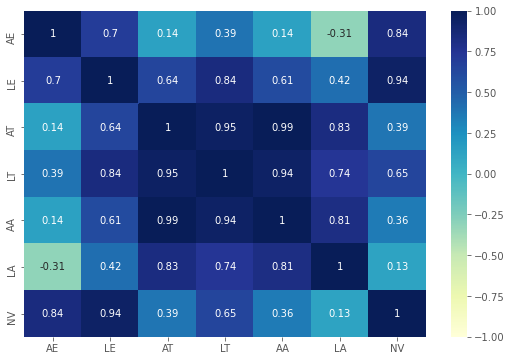

In [14]:
#variables originales del dataset
_print_matriz_correlacion(data.iloc[2:9,2:9].corr())  

<AxesSubplot:>

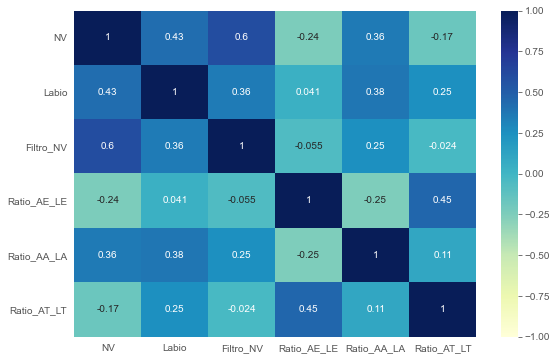

In [137]:
#variables originales del dataset
sns.heatmap(data.iloc[8:,8:].corr(), vmin = -1, vmax = 1, center = 0, cmap = "YlGnBu", annot = True)

In [138]:
#sns.pairplot(data=data,x_vars=['AE','LE','AT','LT','AA','LA','NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
 #        y_vars=['AE','LE','AT','LT','AA','LA','NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
    #         hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5, markers=['o','s','D'],palette='CMRmap', height=1.5);

C:\Users\msaied\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


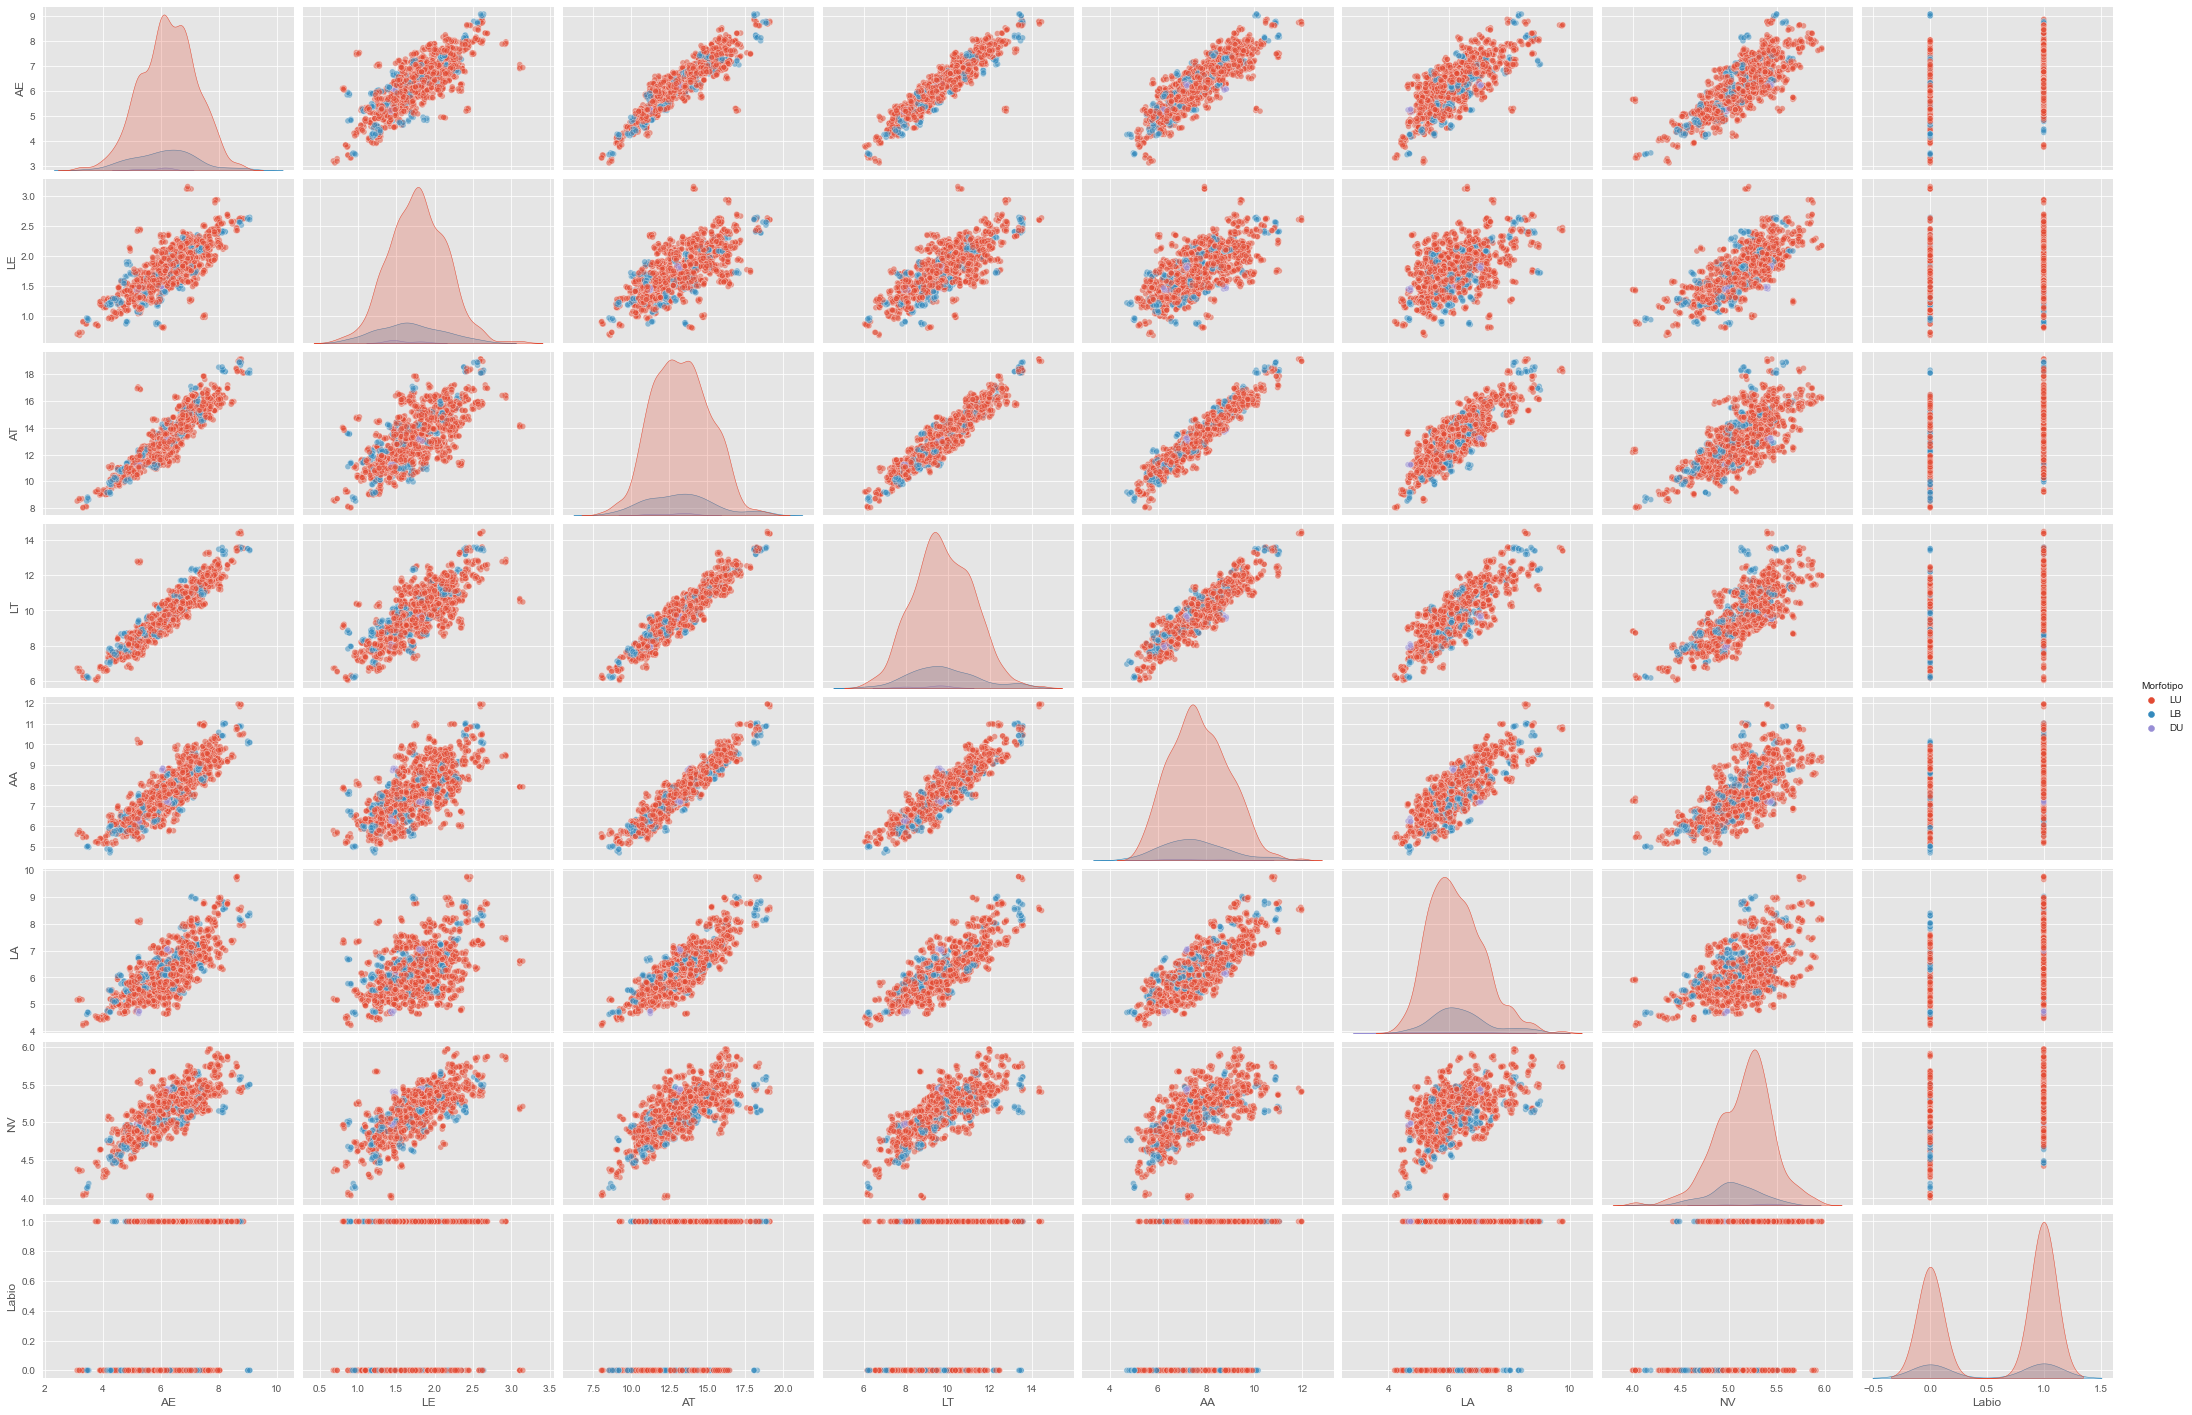

In [139]:
sns.pairplot(data=data,x_vars=['AE','LE','AT','LT','AA','LA','NV','Labio'],\
         y_vars=['AE','LE','AT','LT','AA','LA','NV','Labio'],hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5);

C:\Users\msaied\Anaconda3\envs\ds\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


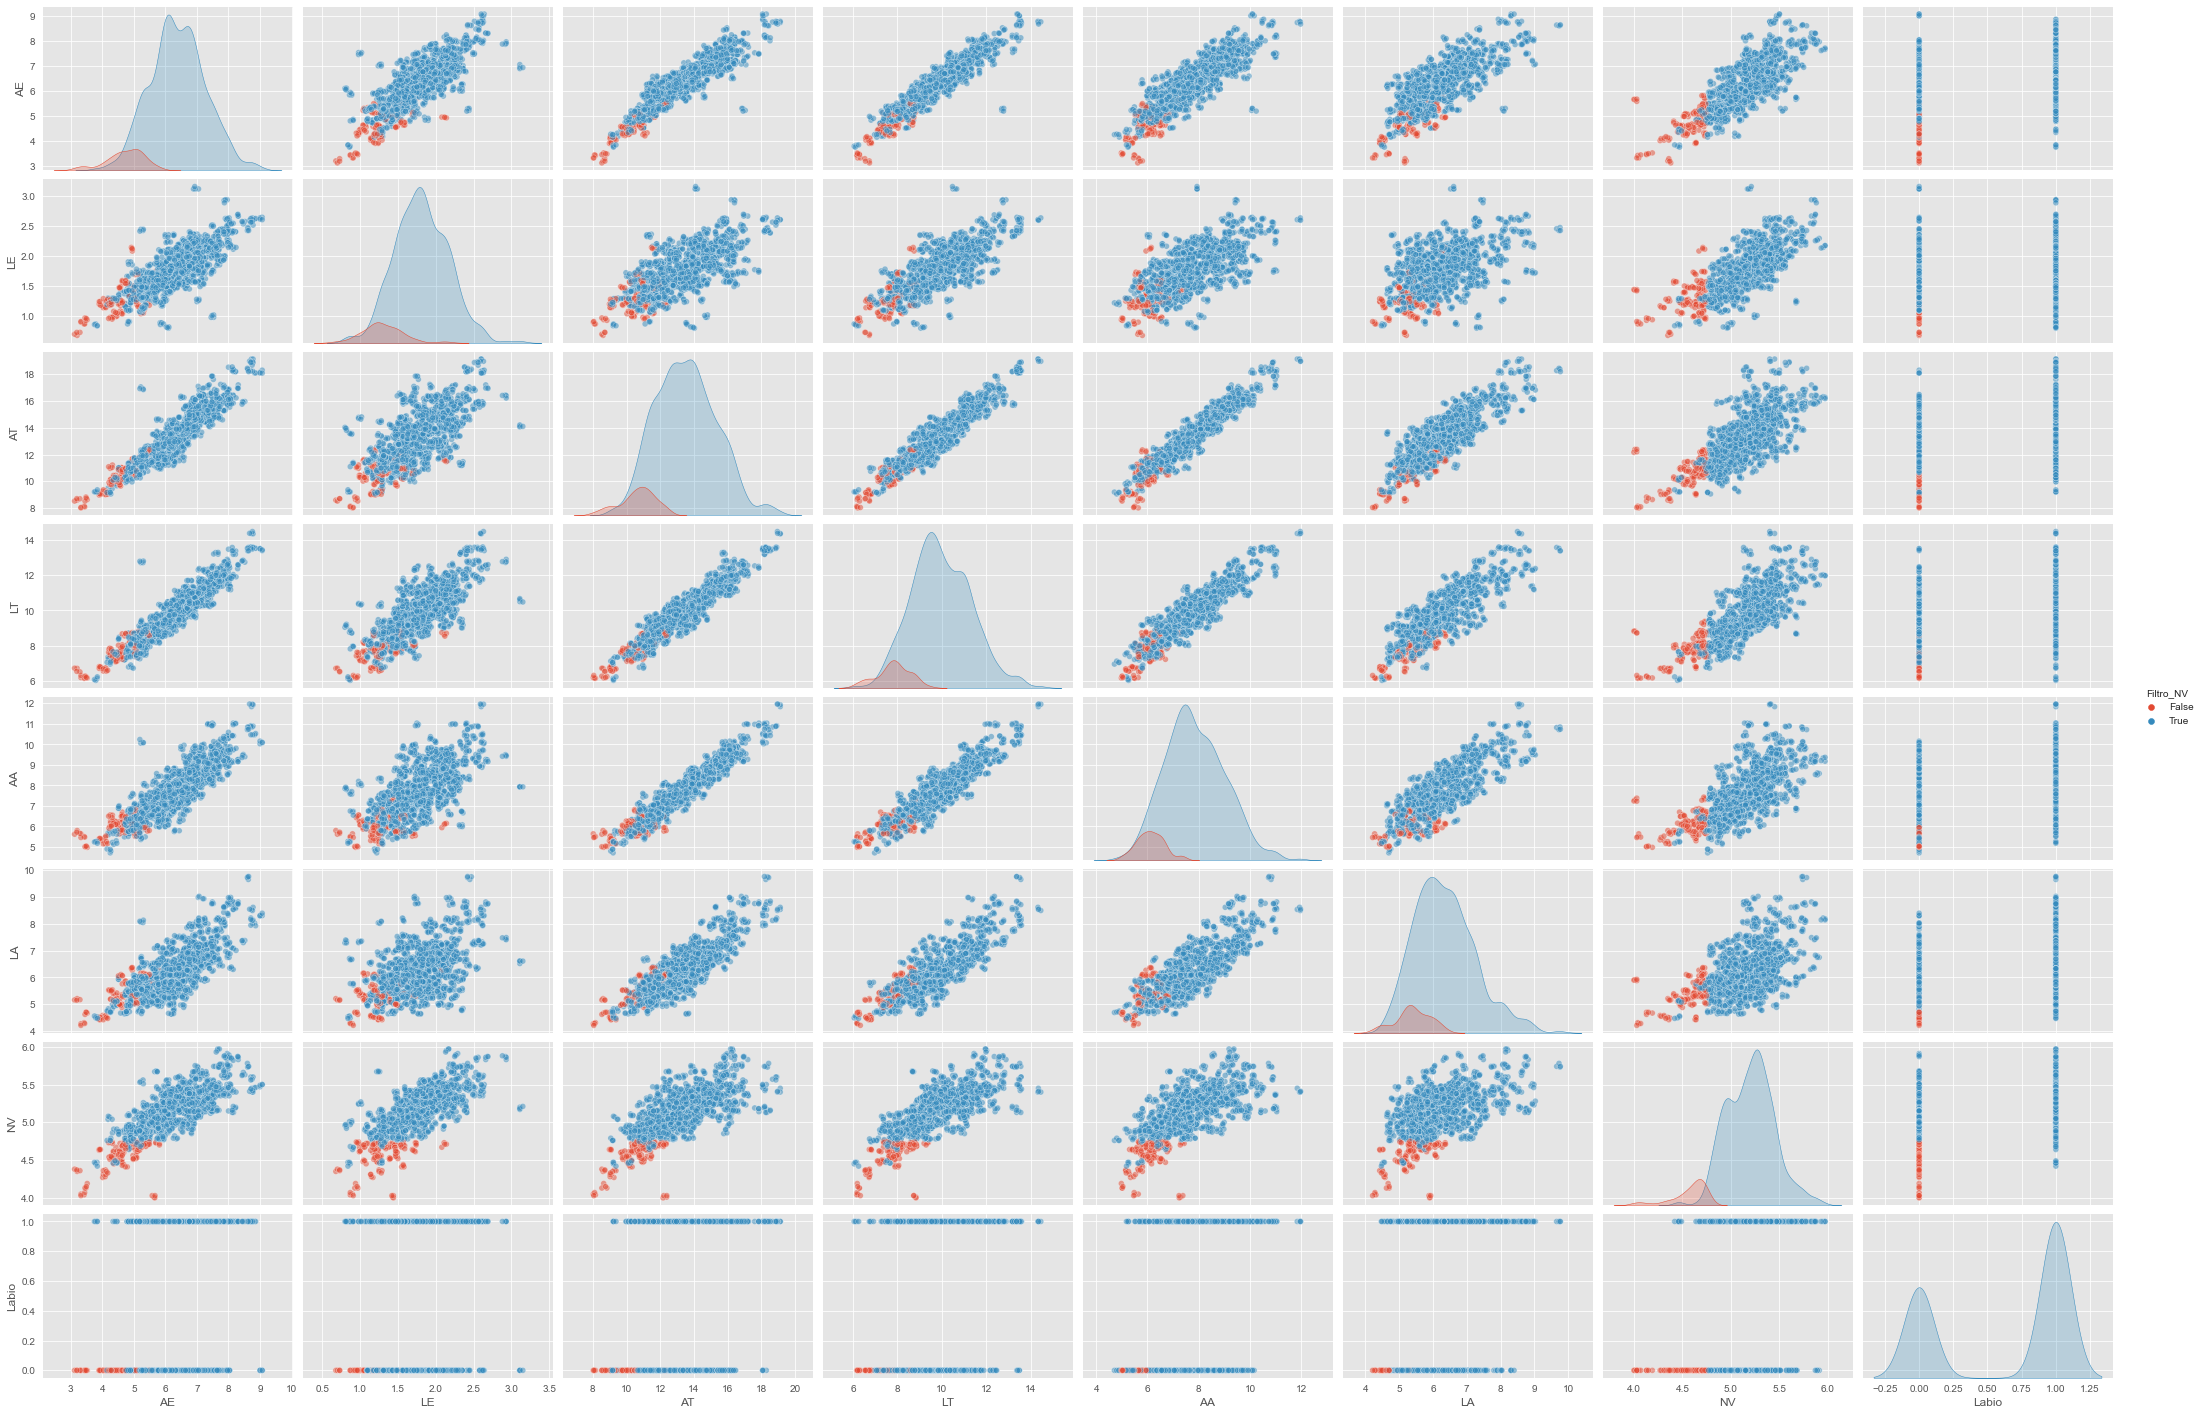

In [140]:
sns.pairplot(data=data,x_vars=['AE','LE','AT','LT','AA','LA','NV','Labio'],\
         y_vars=['AE','LE','AT','LT','AA','LA','NV','Labio'],hue='Filtro_NV',plot_kws={'alpha': 0.5},aspect=1.5);

In [141]:
#sns.pairplot(data=data,x_vars=['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
    #     y_vars=['NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA'],\
     #        hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5, markers=['o','s','D'],palette='CMRmap', height=1.5);

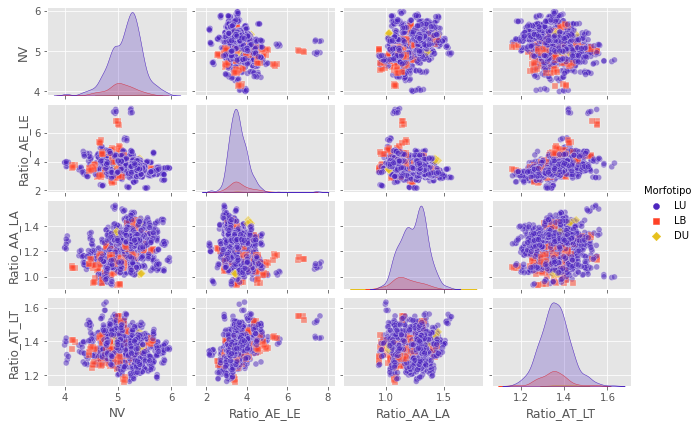

In [15]:
sns.pairplot(data=data,x_vars=['NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT'],\
         y_vars=['NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT'],\
             hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5, markers=['o','s','D'],palette='CMRmap', height=1.5);

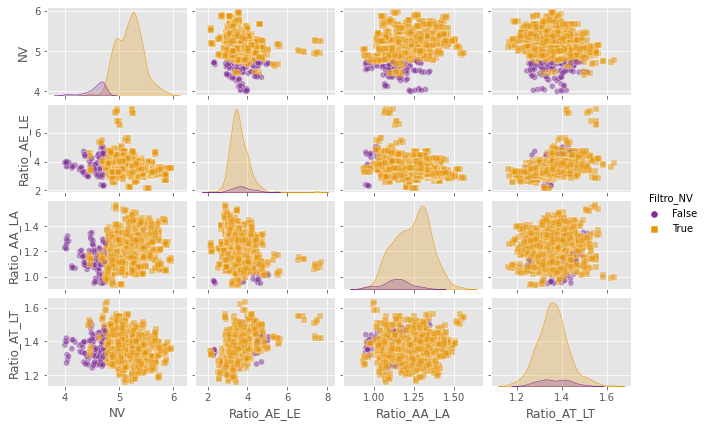

In [17]:
sns.pairplot(data=data,x_vars=['NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT'],\
         y_vars=['NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT'],\
             hue='Filtro_NV',plot_kws={'alpha': 0.5},aspect=1.5, markers=['o','s'],palette='CMRmap', height=1.5);

### Distribución de las observaciones

In [143]:
def distribution_plotter(data, label, bins="auto"):    
    plt.figure(figsize = (10,5))
    sns.set_style("white")    
    dist = sns.histplot(data, bins=bins, stat = "count", kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = 500)    
    dist.set_title('Distribucion ', fontsize = 16)
    plt.xticks(rotation=45, ha='right')

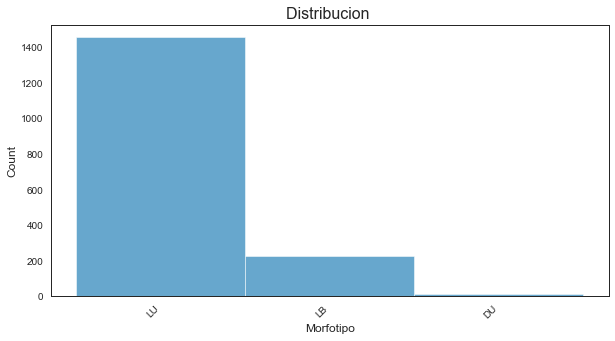

In [144]:
distribution_plotter(data["Morfotipo"],data["Morfotipo"].unique())

In [145]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(15, 9))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  
    plt.show()

In [146]:
#draw_histograms(data, data[['AE','LE','AT','LT','AA','LA','NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']], 4, 4)

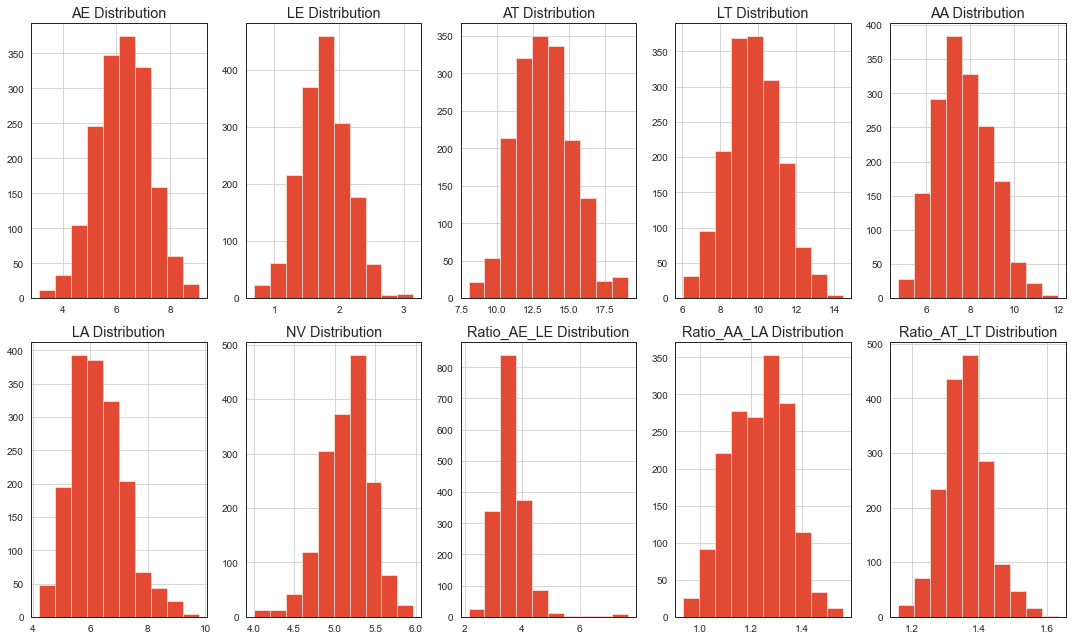

In [147]:
draw_histograms(data, data[["AE","LE","AT","LT","AA","LA","NV","Ratio_AE_LE","Ratio_AA_LA","Ratio_AT_LT"]], 2, 5)

# Modelos de clustering

## Importación modulos y dataset

In [18]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Prueba Kmeans

### Con las variables originales

In [19]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,classification_report,confusion_matrix
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm


In [20]:
x = data[['AE','LE','AT','LT','AA','LA','NV','Labio']]
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_scaled=scaler.fit_transform(x);

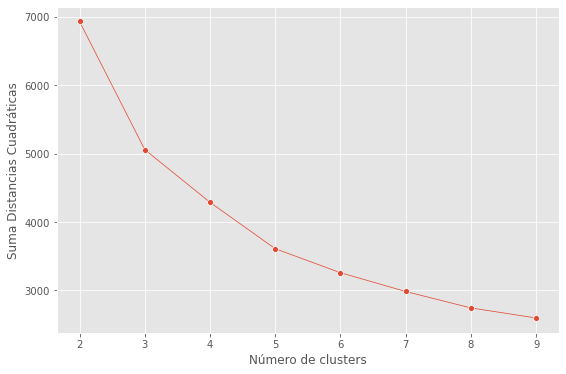

In [21]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters'); 

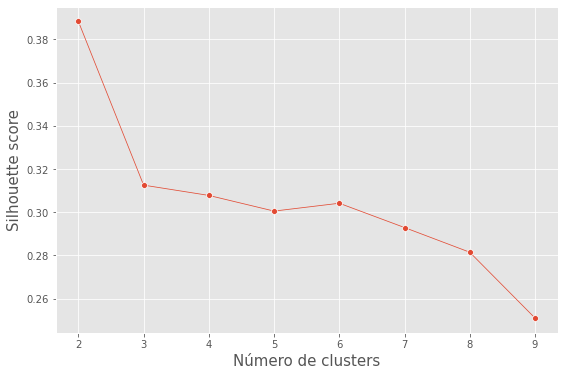

In [22]:
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x_scaled)
    score=silhouette_score(x_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

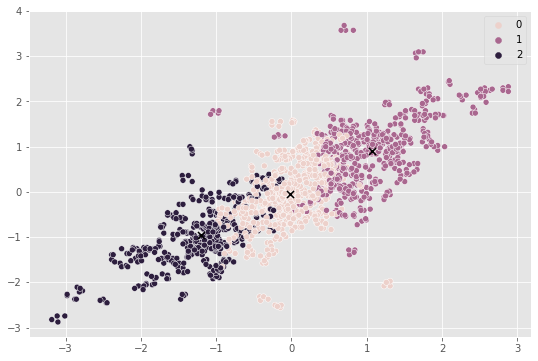

In [23]:
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_scaled)

labels = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_scaled[:,0],y=x_scaled[:,1],hue=labels,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans')

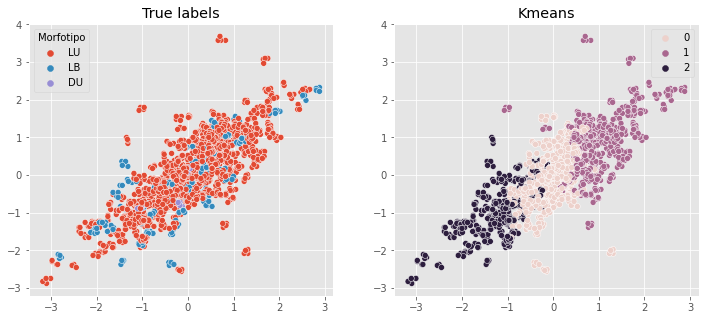

In [24]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=labels,ax=ax[1])
ax[1].set_title('Kmeans')

Text(0.5, 1.0, 'Kmeans')

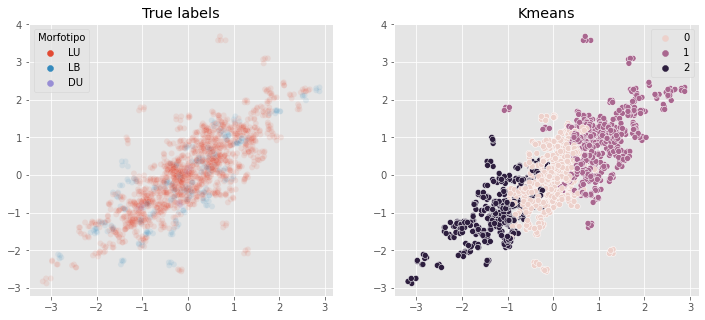

In [26]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],ax=ax[0], hue=y_true, alpha=0.1)
#sns.scatterplot(x = x_scaled[indices,0], y = x_scaled[indices,1],hue=y_true[y_true!="0"],ax=ax[0], palette="magma")
ax[0].set_title('True labels')
sns.scatterplot(x = x_scaled[:,0], y = x_scaled[:,1],hue=labels,ax=ax[1])
ax[1].set_title('Kmeans')

In [75]:
#sns.heatmap(confusion_matrix(y_true,labels),annot=True,cmap='Blues',fmt=".0f");

#print(classification_report(y_true,labels))

### Con todas las variables (menos Labio y Filtro_NV)

In [ ]:
#x_R = data[['AE','LE','AT','LT','AA','LA','NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']]
##x_R = data[['NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT']]
#y_true = data["Morfotipo"]

#scaler = StandardScaler()
#x_R_scaled=scaler.fit_transform(x_R);

In [37]:
x_R = data[['AE','LE','AT','LT','AA','LA','NV','Labio', 'Filtro_NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT']]
y_true = data["Morfotipo"]

scaler = StandardScaler()
x_R_scaled=scaler.fit_transform(x_R);

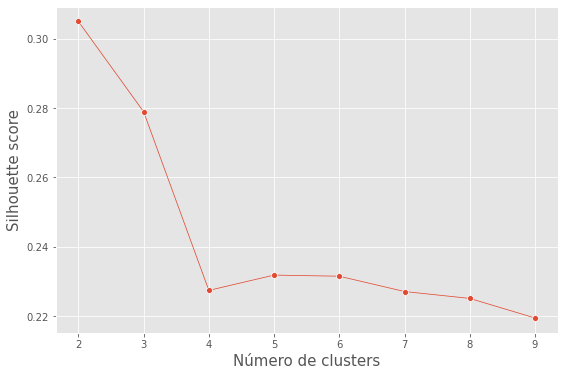

In [38]:
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(x_R_scaled)
    score=silhouette_score(x_R_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=30,legend=False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

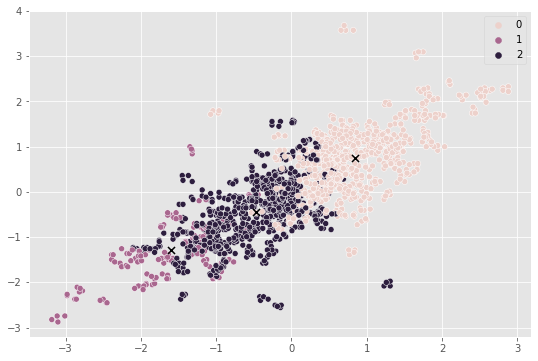

In [39]:
kmeans=KMeans(n_clusters=3,n_init=10,random_state=0) # Numero de repeticiones=10

kmeans.fit(x_R_scaled)

labels_R = kmeans.labels_ # Etiquetas que indican a qué cluster pertenecen los datos
centroids_R = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=x_R_scaled[:,0],y=x_R_scaled[:,1],hue=labels_R,legend='full');

#plt.xlabel('Income',fontsize=15);plt.ylabel('Spending Score',fontsize=15);
plt.scatter(centroids_R[:,0],centroids_R[:,1],marker='x',s=50,color='k');

Text(0.5, 1.0, 'Kmeans_R')

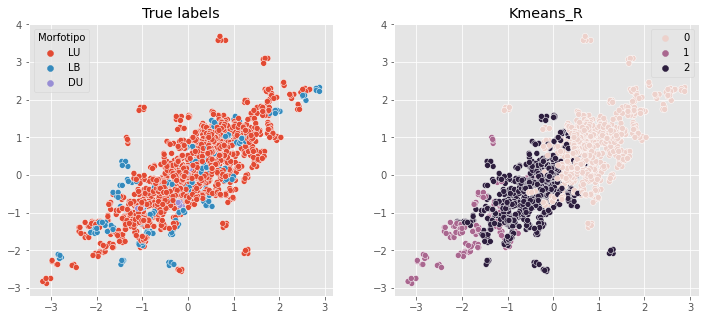

In [40]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=labels_R,ax=ax[1])
ax[1].set_title('Kmeans_R')

## DBSCAN

In [41]:
from scipy.spatial.distance import pdist,squareform

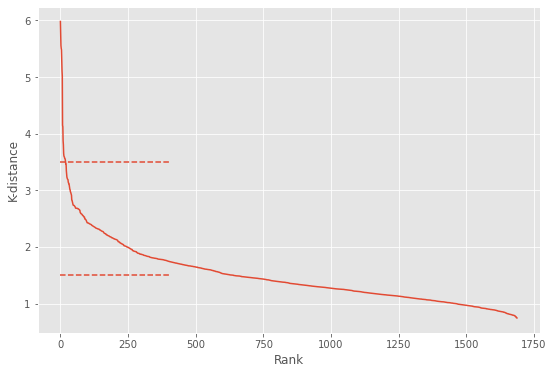

In [43]:
minPts=20;
k=minPts-1;

D=squareform(pdist(x_R_scaled));

k_distances=np.zeros(D.shape[0]);

for i in range(D.shape[0]):
    distances=np.sort(D[i]);
    k_distances[i]=distances[k];
k_distances=np.sort(k_distances);
k_distances=k_distances[::-1];
    
plt.plot(k_distances);
plt.xlabel('Rank');
plt.ylabel('K-distance');
plt.hlines([1.5,3.5],0,400,linestyles='dashed');

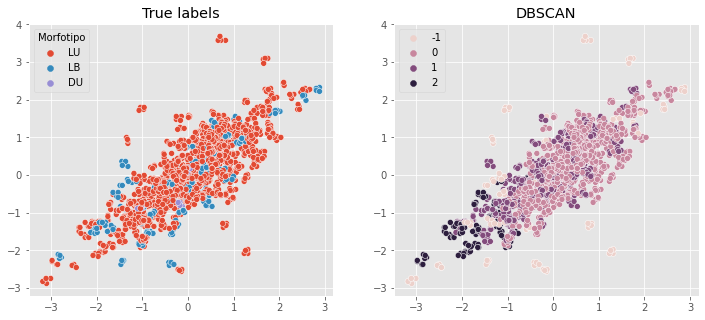

In [44]:
dbscan = DBSCAN(eps=2, min_samples=minPts)
labels_db = dbscan.fit_predict(x_R_scaled)

f,ax=plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=y_true,ax=ax[0])
ax[0].set_title('True labels')
sns.scatterplot(x = x_R_scaled[:,0], y = x_R_scaled[:,1],hue=labels_db,ax=ax[1])
ax[1].set_title('DBSCAN');

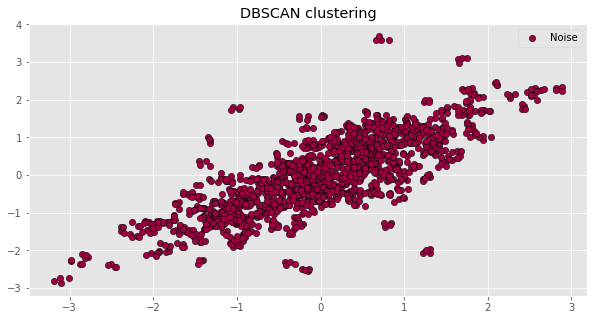

In [45]:
# Implementación de DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(x_R_scaled)
y_dbscan


labels = dbscan.labels_
unique_labels=set(labels);

fig, ax = plt.subplots(figsize=(10,5))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for i,l in enumerate(unique_labels):
    if l ==-1:
        ax.scatter(x_R_scaled[labels==l,0], x_R_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Noise')
    else:
        ax.scatter(x_R_scaled[labels==l,0], x_R_scaled[labels==l,1],color =colors[i], edgecolor='black', marker='o',s=40,label='Cluster '+str(l))
    
ax.legend()
ax.set_title('DBSCAN clustering');
    

# Modelos reducción dimensionalidad

## Prueba PCA

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#std_sclr = StandardScaler()

#X = data[['AE','LE','AT','LT','AA','LA','NV','Filtro_NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']]

#data_std = pd.DataFrame(std_sclr.fit_transform(X))

In [49]:
std_sclr = StandardScaler()

X = data[['AE','LE','AT','LT','AA','LA','NV','Filtro_NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT']]

data_std = pd.DataFrame(std_sclr.fit_transform(X))

In [86]:
model = PCA()

In [87]:
model_pca = model.fit(data_std)

### Pesos (loadings)

In [88]:
#Creamos un DataFrame con los loadings.
pca_loadings = pd.DataFrame(model_pca.components_.T, index=X.columns).iloc[:,:]
pca_loadings.rename(columns = {0 : 'CP1', 1 : 'CP2', 2 : 'CP3', 3 : 'CP4',4 : 'CP5', 5 : 'CP6', 6 : 'CP7', 7 : 'CP8',8 : 'CP9', 9 : 'CP10', 10 : 'CP11'}, inplace = True)
pca_loadings

CP1       CP2       CP3       CP4       CP5       CP6  \
AE          -0.385332  0.058426 -0.027689  0.012523 -0.043716  0.209829   
LE          -0.336068 -0.343452 -0.029286  0.132192  0.264804  0.095660   
AT          -0.380452  0.204597  0.009847  0.146797  0.058235 -0.083778   
LT          -0.391242  0.033601 -0.145100  0.090763 -0.146376 -0.110365   
AA          -0.374710  0.155497  0.072529  0.197215 -0.153992 -0.276498   
LA          -0.317908  0.289749 -0.385978  0.066400  0.107174 -0.208816   
NV          -0.342974 -0.112871  0.062956 -0.280857 -0.005814  0.758661   
Filtro_NV   -0.218586 -0.023398  0.224627 -0.844996  0.157829 -0.398552   
Ratio_AE_LE  0.086437  0.643927  0.000050 -0.210007 -0.506762  0.211657   
Ratio_AA_LA -0.157857 -0.184232  0.738622  0.212841 -0.410294 -0.113741   
Ratio_AT_LT  0.038587  0.515397  0.472231  0.164241  0.646419  0.124182   

                  CP7       CP8       CP9      CP10      CP11  
AE          -0.604277  0.111348 -0.650525 -0.010840  0.019846  
LE          -0.372382  0.411615  0.600819 -0.031742 -0.037524  
AT          -0.052855 -0.531758  0.151492  0.052368 -0.685629  
LT          -0.062158 -0.506965  0.208599  0.023072  0.691361  
AA           0.329308  0.297495 -0.085863 -0.697620 -0.010073  
LA           0.321035  0.376047 -0.085785  0.595318  0.016274  
NV           0.457868 -0.036972 -0.001515 -0.012591 -0.003710  
Filtro_NV   -0.055877  0.006807  0.015574 -0.005608  0.000764  
Ratio_AE_LE -0.246295  0.191982  0.366183 -0.013467 -0.019708  
Ratio_AA_LA  0.067580  0.100807 -0.011193  0.392429  0.011951  
Ratio_AT_LT -0.004840 -0.006962  0.013388 -0.012333  0.221853

In [89]:
pca_loadings.T.dot(pca_loadings)

CP1           CP2           CP3           CP4           CP5  \
CP1   1.000000e+00 -6.322656e-17 -2.941387e-17  3.064637e-17  2.280904e-17   
CP2  -6.322656e-17  1.000000e+00  3.402273e-17 -6.468979e-17 -3.019112e-17   
CP3  -2.941387e-17  3.402273e-17  1.000000e+00 -1.243097e-17 -2.590439e-16   
CP4   3.064637e-17 -6.468979e-17 -1.243097e-17  1.000000e+00  9.097738e-17   
CP5   2.280904e-17 -3.019112e-17 -2.590439e-16  9.097738e-17  1.000000e+00   
CP6   6.954964e-17 -6.101618e-17  1.127520e-16 -2.725527e-17 -1.605263e-16   
CP7  -7.247731e-17  2.045905e-16 -9.236785e-17  7.656346e-20 -2.682265e-16   
CP8   7.346467e-17  7.900664e-18 -7.838322e-17 -5.688631e-17  7.351368e-17   
CP9   3.223188e-17 -2.405961e-16 -1.059692e-17 -2.091808e-16  1.674033e-16   
CP10 -3.496826e-17  4.975271e-17 -1.481941e-16 -6.960443e-17  9.540866e-17   
CP11  2.533967e-18  1.341171e-16 -8.254099e-17  5.903434e-17 -1.700891e-16   

               CP6           CP7           CP8           CP9          CP10  \
CP1   6.954964e-17 -7.247731e-17  7.346467e-17  3.223188e-17 -3.496826e-17   
CP2  -6.101618e-17  2.045905e-16  7.900664e-18 -2.405961e-16  4.975271e-17   
CP3   1.127520e-16 -9.236785e-17 -7.838322e-17 -1.059692e-17 -1.481941e-16   
CP4  -2.725527e-17  7.656346e-20 -5.688631e-17 -2.091808e-16 -6.960443e-17   
CP5  -1.605263e-16 -2.682265e-16  7.351368e-17  1.674033e-16  9.540866e-17   
CP6   1.000000e+00  1.391181e-16 -2.627594e-17  3.377902e-16 -3.244309e-17   
CP7   1.391181e-16  1.000000e+00 -3.029586e-16  5.928641e-17  6.395788e-17   
CP8  -2.627594e-17 -3.029586e-16  1.000000e+00  1.176611e-16 -9.176660e-19   
CP9   3.377902e-16  5.928641e-17  1.176611e-16  1.000000e+00 -5.305567e-17   
CP10 -3.244309e-17  6.395788e-17 -9.176660e-19 -5.305567e-17  1.000000e+00   
CP11  5.211038e-17  1.591314e-16 -1.088347e-16 -8.261835e-17  2.838816e-16   

              CP11  
CP1   2.533967e-18  
CP2   1.341171e-16  
CP3  -8.254099e-17  
CP4   5.903434e-17  
CP5  -1.700891e-16  
CP6   5.211038e-17  
CP7   1.591314e-16  
CP8  -1.088347e-16  
CP9  -8.261835e-17  
CP10  2.838816e-16  
CP11  1.000000e+00

In [90]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

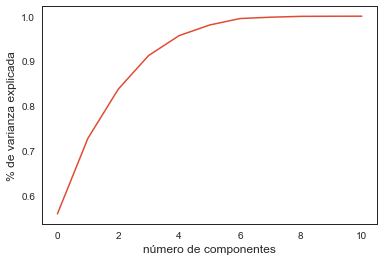

In [91]:
plot_explained_variance(components_count = 11, X = data_std)

### Proyección

In [ ]:
#nuevo dataset con cada participación de feature
#nuevo_data_pca = pd.DataFrame(model_pca.fit_transform(data_std), index =X.index,\
     #                         columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])

In [92]:
#nuevo dataset con cada participación de feature
nuevo_data_pca = pd.DataFrame(model_pca.fit_transform(data_std), index =X.index,\
                              columns=['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10','PC11'])

In [93]:
nuevo_data_pca.head(10)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.338805 -1.222706 -0.860351  0.153694  1.226163 -0.343477  0.489479   
1 -1.440177 -1.359508 -0.877649  0.172257  1.036304 -0.417883  0.598154   
2 -1.304239 -1.066364 -0.825665  0.145051  1.472003 -0.254947  0.625296   
3 -1.410386 -1.271698 -0.829812  0.090021  1.079965 -0.214319  0.540409   
4  2.153882  0.593790 -0.312557 -0.905183  0.809025  0.101694 -0.184378   
5  2.056049  0.652173 -0.364264 -0.982097  0.431609  0.151972 -0.298147   
6  1.949593  0.614262 -0.298937 -1.013810  0.215746  0.210368 -0.146594   
7  2.093339  0.429827 -0.246575 -0.903893  0.602868  0.086758 -0.107032   
8 -0.411752 -0.104748  1.087595  0.232258 -0.075087 -0.472815  0.182531   
9 -0.387805 -0.260245  0.885597  0.195996 -0.040333 -0.491810  0.126354   

        PC8       PC9      PC10      PC11  
0  0.029752  0.334387  0.007319 -0.013266  
1  0.163325  0.309962 -0.003471 -0.006680  
2  0.097228  0.317503  0.007248 -0.021089  
3  0.155537  0.270522 -0.006343 -0.011003  
4  0.066534 -0.104512 -0.052318  0.006510  
5  0.067288 -0.112826 -0.049225 -0.000649  
6  0.096128 -0.112190 -0.045424 -0.002811  
7  0.101186 -0.111863 -0.050018  0.002515  
8 -0.086706  0.021358  0.014571 -0.003347  
9 -0.086458  0.029254  0.012833 -0.002593

In [94]:
nuevo_data_pca.shape

(1688, 11)

In [95]:
model_pca.explained_variance_ratio_

array([5.59166741e-01, 1.68283629e-01, 1.09938821e-01, 7.51427550e-02,
       4.41804965e-02, 2.36297885e-02, 1.44086645e-02, 3.02093486e-03,
       1.86491456e-03, 2.67321451e-04, 9.59340398e-05])

### Bastón quebrado

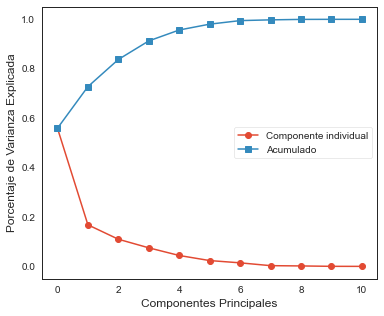

In [96]:
plt.figure(figsize=(6,5))

plt.plot(model_pca.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot(np.cumsum(model_pca.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada'); plt.xlabel('Componentes Principales')
plt.ylim(-0.05,1.05); plt.xticks()
plt.legend(loc=0);

## Prueba TSNE

In [46]:
from sklearn.manifold import TSNE

In [50]:
tsne = TSNE(random_state=42)

proj_tsne = tsne.fit_transform(data_std)

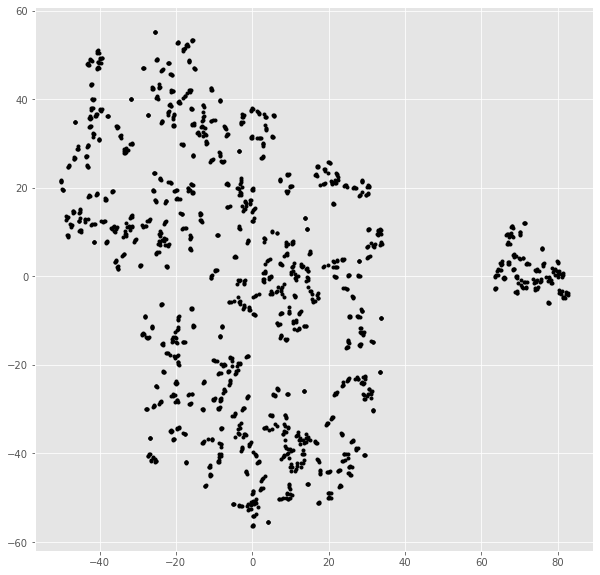

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))

# get axis from plot -  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html
ax = ax or plt.gca()
    
coord_x = proj_tsne[:, 0]
coord_y = proj_tsne[:, 1]
ax.plot(coord_x, coord_y, '.k')    

# Modelos clasificación

## CART con oversampling

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
#newX = data[['AE','LE','AT','LT','AA','LA','NV','Labio','Filtro_NV','Ratio_LE_AE','Ratio_LT_AT','Ratio_LA_AA','Ratio_LE_LT','Ratio_AE_AT','Ratio_LA_LT','Ratio_AA_AT','Ratio_LE_LA','Ratio_AE_AA']]
#newy = data['Morfotipo']

In [164]:
newX = data[['AE','LE','AT','LT','AA','LA','NV','Labio','Filtro_NV','Ratio_AE_LE','Ratio_AA_LA','Ratio_AT_LT']]
newy = data['Morfotipo']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(newX,newy,stratify = data['Morfotipo'],random_state=0)

In [166]:
# chequeamos la presencia relativa de cada clase y el tamaño de los datasets
print('Entrenamiento:',X_train.shape)
print('Testeo:',X_test.shape)
print('\nClases train:')
print(y_train.value_counts(normalize=True))
print('\nClases test:')
print(y_test.value_counts(normalize=True))

Entrenamiento: (1266, 12)
Testeo: (422, 12)

Clases train:
LU    0.860190
LB    0.132701
DU    0.007109
Name: Morfotipo, dtype: float64

Clases test:
LU    0.860190
LB    0.132701
DU    0.007109
Name: Morfotipo, dtype: float64


### OverSampling

In [167]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os,y_train_os=oversampler.fit_resample(X_train,y_train);

print('Composición del training set:')
print(y_train_os.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
DU    1089
LU    1089
LB     168
Name: Morfotipo, dtype: int64

Composición del test set:
LU    363
LB     56
DU      3
Name: Morfotipo, dtype: int64


In [168]:
X_train_os2,y_train_os2=oversampler.fit_resample(X_train_os,y_train_os);

print('Composición del training set:')
print(y_train_os2.value_counts())

print('\nComposición del test set:')
print(y_test.value_counts())

Composición del training set:
DU    1089
LB    1089
LU    1089
Name: Morfotipo, dtype: int64

Composición del test set:
LU    363
LB     56
DU      3
Name: Morfotipo, dtype: int64


## CART

In [169]:
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix

In [170]:
clf_dt = DecisionTreeClassifier(max_depth = 7, random_state=42)
clf_dt = clf_dt.fit(X_train_os2,y_train_os2)

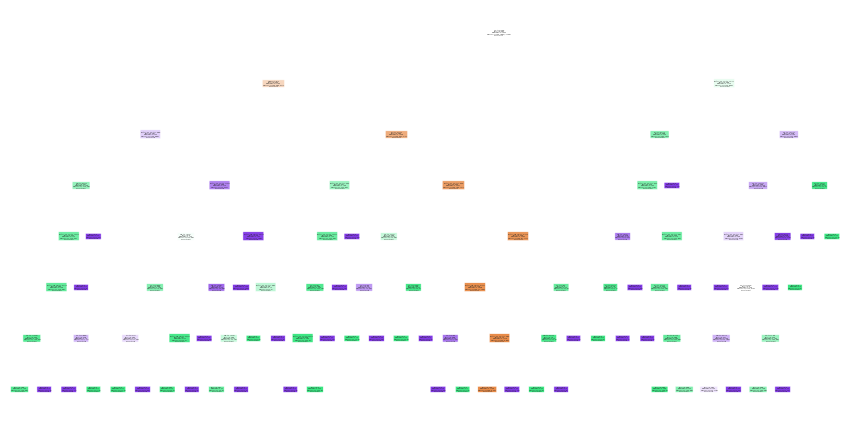

In [171]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["LU","DU", "LB"], 
          feature_names=X_train_os2.columns); 

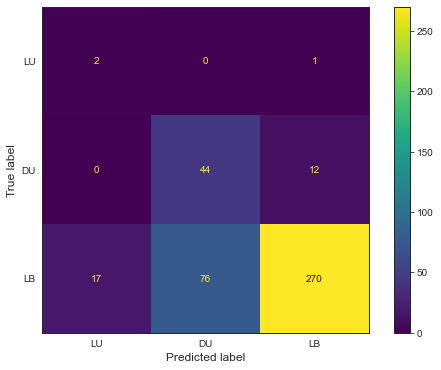

In [172]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["LU","DU","LB"])